In [1]:
library(igraph)
library(vegan)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: permute

Attaching package: ‘permute’

The following object is masked from ‘package:igraph’:

    permute

Loading required package: lattice
This is vegan 2.4-3

Attaching package: ‘vegan’

The following object is masked from ‘package:igraph’:

    diversity



In [2]:
g <- graph("zachary")

# edges <- read.table("cites.csv")
# g <- graph.data.frame(edges, directed = F)

g_decomposed <- decompose(g)
g <- g_decomposed[[which.max(sapply(g_decomposed, function(i) length(V(i))))]]
g <- simplify(g)

In [3]:
# for zachary
V(g)$name <- as.character(1:34)

In [4]:
nodes <- V(g)$name

In [5]:
nodes

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34"

In [6]:
partition_density <- function(community) {
    
    # number of nodes
    n <- length(V(community))
    
    # number of edges
    m <- length(E(community))
    
    return (n * ((m - (n - 1)) / ((n - 2) * (n - 1))) )
}

In [7]:
score_partition <- function(g, communities) {
 
    # number of nodes in network
    N <- length(V(g))

    # number of communities
    k <- length(communities)

    # weighted patition score for entire network
    return(2 / (sqrt(k) * N) * sum(sapply(communities, partition_density)))

}

In [8]:
# local density

# structural similairty funciton
structureSimilarity <- function(g, nv, nw) {
    return(length(intersect(nv, nw)) / 
          sqrt(length(nv) * length(nw)))
}

# pre compute neighbourhoods
neighbourhoods <- sapply(nodes, function(v) {
    neighborhood(g, v, order=1)
})


# compute similiarity of all nodes 
structureSimilarities <- sapply(neighbourhoods, function(nv) {
    sapply(neighbourhoods, function(nw) {
        structureSimilarity(g, nv, nw)
    })
})


# disatnce = 1 / similarity
distances <- sapply(1:nrow(structureSimilarities), function(i){
    sapply(1:ncol(structureSimilarities), function(j) {
        if (i == j){
            return (0)
        } else if (structureSimilarities[i,j] == 0){
            return (.Machine$double.xmax)
        } else {
            return (1 / structureSimilarities[i,j])
        }
    })
})

In [46]:
# isomap embedding 
iso <- isomap(dist = as.dist(distances), ndim = 2, k = 5)
X <- iso$points

In [47]:
# distance between all points
d <- as.matrix(dist(X))

In [48]:
#distance cut off value
dc <- 3

In [49]:
# density of node
rhos <- apply(d, 1, function(row) {
    sum(row < dc)
})
names(rhos) <- nodes

In [50]:
head(rhos)

1  2  3  4  5  6 
11 12 11 11  8  6

In [51]:
# compute deltas
deltas <- sapply(1:length(rhos), function(i) {
    
    #row in distance matrix of interest
    d2Node <- d[names(rhos)[i],]
    
    if (rhos[i] == max(rhos)) {
        # assign point with moximum density the greatest distance
        return(max(d2Node))
    } else {
        #assign minimum distance of node with greater rho
        return(min(d2Node[rhos > rhos[i]]))
    }
    
}) 
names(deltas) <- nodes

In [52]:
# gammas
gammas <- rhos * deltas
names(deltas) <- nodes

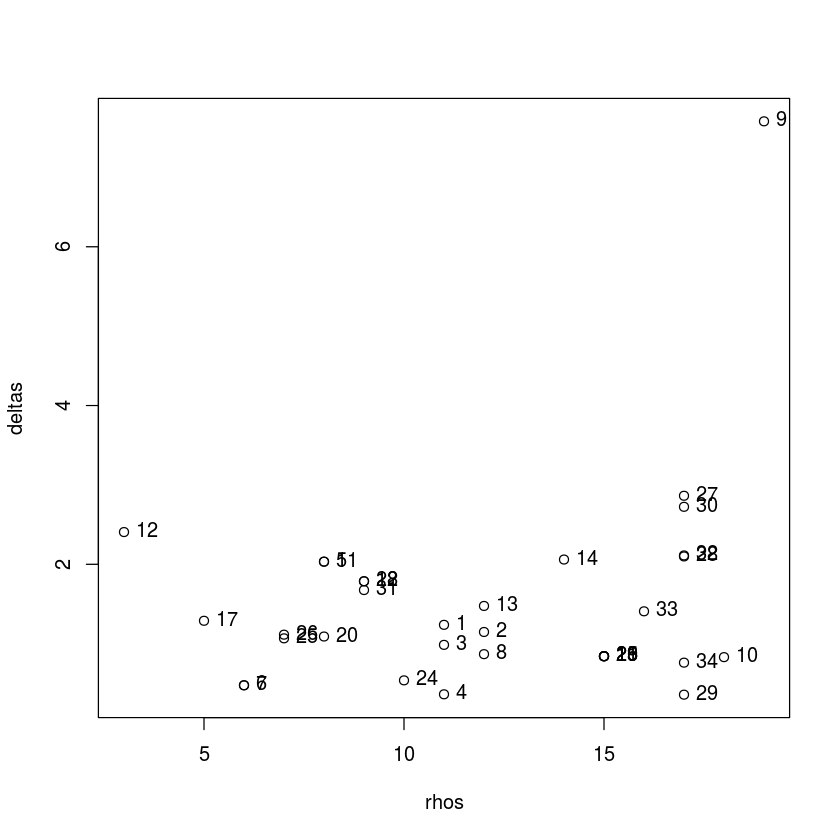

In [54]:
plot(rhos, deltas)
text(rhos, deltas, labels = nodes, pos=4) 

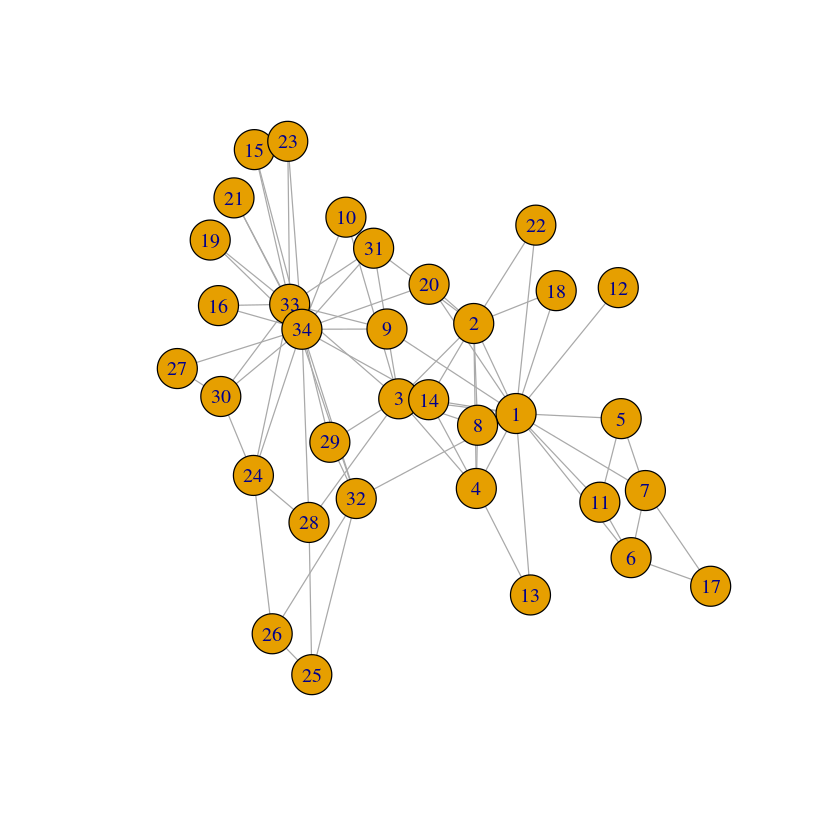

In [35]:
plot(g)

In [61]:
dim(X)

[1] 34  2

In [72]:
X[27,]

[1] 3.666611 1.008620

In [75]:
matrix(c(X[27,], X[9,], X[30,]), 3, 2, byrow = T)

3.666611,1.0086197
1.001847,-0.2244975
3.476659,1.2513796


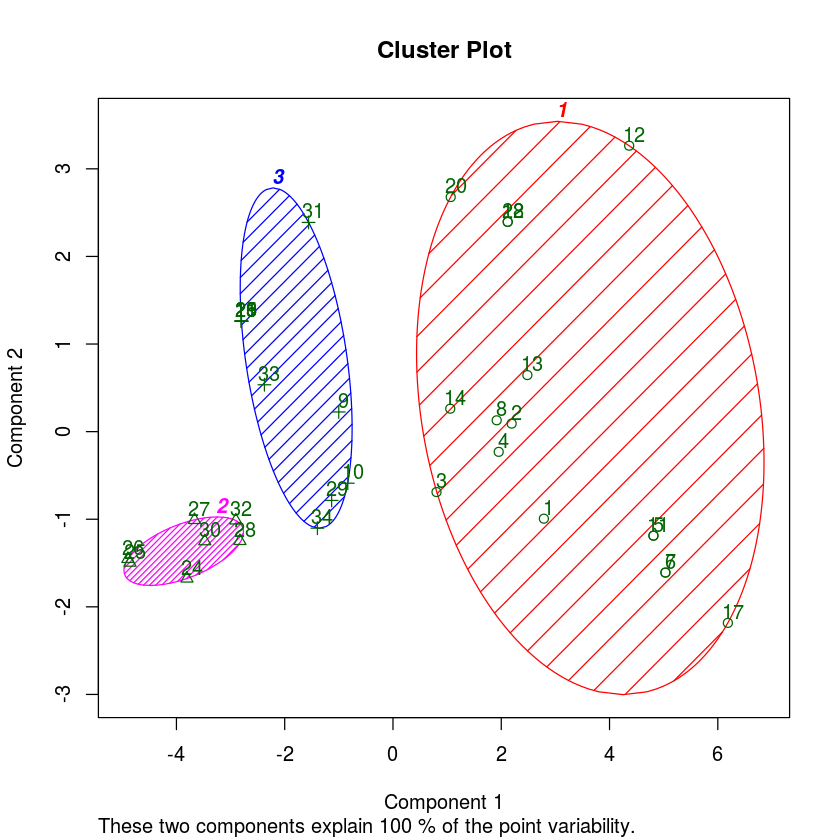

In [77]:
library(cluster)
kme <- kmeans(X, centers = matrix(c(X[9,], X[27,], X[30,]), ncol=2, byrow = T))
clusplot(X, kme$cluster, color=TRUE, shade=TRUE,
   labels=2, lines=0, main="Cluster Plot")

In [ ]:
label_assignment <- function() {
    
}